In [45]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up

### Extracting the data
##### Utilizing Yahoo finance's API to get the relevant that we need

In [46]:
# creating a defined function for importing stock data
def import_securities_data(securities_tickers, enter_time_amount, enter_time_type):

    # time delta method function doesnt take the following date time types, it only takes in days. so we convert the respective time types into days by doing some quick math for the user to convert into days
    other_times_types = ['y', 'Y',  'm', 'M', 'w', 'W']
    
    month_type = ['m', 'M']

    week_type = ['w', 'W']

    year_type = ['y', 'Y']

    # if statement that allows us to make a conditional statement to see if the user has inputted any of the time types listed under the other_times_types variable. if so is the case it moves on to the follwing if conditional statements and executes the respective function under the if statenebt that the conditional value was true
    if enter_time_type in other_times_types:
        
        if enter_time_type in month_type: 
            
            enter_time_amount = 30 * enter_time_amount

        elif enter_time_type in week_type:

            enter_time_amount = 7 * enter_time_amount
        
        elif enter_time_type in year_type:

            enter_time_amount = 365 * enter_time_amount

    
    # create a variable to assign the end date and start dates of the data that we want to dowload, the start date is dynamic and customizable to the user's preference of the data one want to download
    # credit to John Droescher for this part of the code
    start_date = dt.datetime.today() - pd.Timedelta(enter_time_amount, "d")
    end_date = dt.datetime.today()
    
    # this returns all of the securities related historical data utilizing yahoo finance's API
    return yf.download(start= start_date, end= end_date, tickers= securities_tickers)

In [47]:
# creating a list of the ticker names of the stocks we want to use for our portfolio. This will help us in downloading the data from the yf alius library that was declared as well for creating the ticker column in our pandas dataframe
stock_pick = ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']
etf_pick = ['SPY', 'IWM', 'DIA']

# this will download all of the relevant data related to our constituent's of selected stocks and etfs
portfolio_individual = import_securities_data(stock_pick, 1, "y")
portfolio_etf = import_securities_data(etf_pick, 1, "y")

[*********************100%%**********************]  7 of 7 completed


[*********************100%%**********************]  3 of 3 completed


In [48]:
# visualizing the data to make sure all the data was imported correctly
portfolio_individual

Price        Adj Close                                               \
Ticker            AAPL        BND          F         JPM         KO   
Date                                                                  
2023-02-21  147.691650  69.645584  11.428380  135.752762  57.971058   
2023-02-22  148.119385  69.800545  11.437748  134.712479  58.145546   
2023-02-23  148.606781  70.052376  11.306602  135.791641  58.252190   
2023-02-24  145.931076  69.664970  11.128619  137.016663  58.009834   
2023-02-27  147.134628  69.781174  11.297235  138.212509  57.990444   
...                ...        ...        ...         ...        ...   
2024-02-13  185.039993  71.760002  12.346848  174.259995  59.349998   
2024-02-14  184.149994  72.029999  12.230000  176.029999  59.290001   
2024-02-15  183.860001  72.230003  12.520000  179.869995  59.400002   
2024-02-16  182.309998  72.000000  12.300000  179.029999  59.389999   
2024-02-20  181.559998  72.089996  12.250000  179.729996  60.700001   

Price                                   Close                    ...  \
Ticker            MSFT          O        AAPL        BND      F  ...   
Date                                                             ...   
2023-02-21  250.613144  61.790966  148.479996  71.910004  12.20  ...   
2023-02-22  249.462585  62.075188  148.910004  72.070000  12.21  ...   
2023-02-23  252.696060  62.605751  149.399994  72.330002  12.07  ...   
2023-02-24  247.191238  61.563599  146.710007  71.930000  11.88  ...   
2023-02-27  248.123581  61.355160  147.919998  72.050003  12.06  ...   
...                ...        ...         ...        ...    ...  ...   
2024-02-13  405.570007  51.520000  185.039993  71.760002  12.68  ...   
2024-02-14  409.489990  51.389999  184.149994  72.029999  12.56  ...   
2024-02-15  406.559998  52.020000  183.860001  72.230003  12.52  ...   
2024-02-16  404.059998  52.330002  182.309998  72.000000  12.30  ...   
2024-02-20  402.790009  52.470001  181.559998  72.089996  12.25  ...   

Price            Open                           Volume                      \
Ticker             KO        MSFT          O      AAPL       BND         F   
Date                                                                         
2023-02-21  59.990002  254.479996  65.750000  58867200  16093200  77724200   
2023-02-22  59.849998  254.089996  65.830002  51011300   4375600  52844700   
2023-02-23  60.009998  255.559998  66.050003  48394200   4789200  57952800   
2023-02-24  59.680000  249.960007  65.720001  55469600   4345900  50631600   
2023-02-27  60.180000  252.460007  65.650002  44998500   3340500  60378100   
...               ...         ...        ...       ...       ...       ...   
2024-02-13  59.500000  404.940002  51.740002  56529500  12938800  67907700   
2024-02-14  59.169998  408.070007  51.750000  54630500   6915700  52978800   
2024-02-15  59.419998  408.140015  51.820000  65434500   6733900  57811800   
2024-02-16  59.349998  407.959991  51.500000  49701400   5029200  43172000   
2024-02-20  59.595001  403.239990  52.459999  49303267   7604731  43304504   

Price                                              
Ticker           JPM        KO      MSFT        O  
Date                                               
2023-02-21   9996300  14278300  28397400  2603800  
2023-02-22  11107500  12409600  22491100  3501900  
2023-02-23   8068000  12222800  29219100  3560100  
2023-02-24   9126900   9736200  24990900  3220400  
2023-02-27  10014700   8849800  21190000  3981100  
...              ...       ...       ...      ...  
2024-02-13   8397600  24195700  27824900  9692900  
2024-02-14   7056700  15872500  20401200  5923100  
2024-02-15   8723400  13695800  21825500  5127100  
2024-02-16   8148100  13943300  22281100  5665500  
2024-02-20   7491660  18304430  24017664  5980576  

[251 rows x 42 columns]

In [49]:
# visualizing the data to make sure all the data was imported correctly
portfolio_etf

Price        Adj Close                               Close              \
Ticker             DIA         IWM         SPY         DIA         IWM   
Date                                                                     
2023-02-21  324.865936  184.678192  393.115204  331.250000  187.429993   
2023-02-22  324.149963  185.180710  392.573425  330.519989  187.940002   
2023-02-23  325.277832  186.501038  394.661682  331.670013  189.279999   
2023-02-24  321.796173  184.757019  390.445740  328.119995  187.509995   
2023-02-27  322.718079  185.407318  391.775543  329.059998  188.169998   
...                ...         ...         ...         ...         ...   
2024-02-13  382.216553  194.610001  494.079987  382.820007  194.610001   
2024-02-14  383.684265  199.130005  498.570007  384.290009  199.130005   
2024-02-15  387.638000  204.440002  502.010010  388.250000  204.440002   
2024-02-16  386.190002  201.660004  499.510010  386.190002  201.660004   
2024-02-20  385.690002  198.880005  496.760010  385.690002  198.880005   

Price                         High                                 Low  \
Ticker             SPY         DIA         IWM         SPY         DIA   
Date                                                                     
2023-02-21  399.089996  335.940002  191.339996  404.160004  331.100006   
2023-02-22  398.540009  332.429993  189.149994  401.130005  329.450012   
2023-02-23  400.660004  332.750000  190.300003  402.200012  327.980011   
2023-02-24  396.380005  329.140015  187.779999  397.250000  326.429993   
2023-02-27  397.730011  331.980011  190.199997  401.290009  328.200012   
...                ...         ...         ...         ...         ...   
2024-02-13  494.079987  385.160004  197.630005  497.089996  380.459991   
2024-02-14  498.570007  384.549988  199.789993  499.070007  382.070007   
2024-02-15  502.010010  388.329987  204.770004  502.200012  384.880005   
2024-02-16  499.510010  388.250000  203.699997  502.869995  385.700012   
2024-02-20  496.760010  386.570007  199.720001  498.410004  384.549988   

Price                                     Open                          \
Ticker             IWM         SPY         DIA         IWM         SPY   
Date                                                                     
2023-02-21  187.240005  398.820007  334.720001  190.750000  403.059998   
2023-02-22  186.750000  397.019989  331.750000  187.830002  399.519989   
2023-02-23  186.699997  396.250000  331.850006  189.350006  401.559998   
2023-02-24  185.779999  393.640015  327.829987  186.649994  395.420013   
2023-02-27  187.600006  396.750000  330.730011  189.130005  399.869995   
...                ...         ...         ...         ...         ...   
2024-02-13  193.059998  490.720001  385.070007  196.220001  494.529999   
2024-02-14  196.229996  494.399994  384.000000  197.679993  496.790009   
2024-02-15  200.720001  498.799988  385.190002  200.990005  499.290009   
2024-02-16  201.089996  498.750000  387.170013  202.119995  501.700012   
2024-02-20  198.009995  494.459991  385.510010  199.149994  497.720001   

Price        Volume                       
Ticker          DIA       IWM        SPY  
Date                                      
2023-02-21  3142900  26004000   82655900  
2023-02-22  2896400  24651700   83742300  
2023-02-23  5999600  21311700   96242400  
2023-02-24  3764700  24280700  108194400  
2023-02-27  2887300  17562900   80444700  
...             ...       ...        ...  
2024-02-13  5325300  86247400  113099200  
2024-02-14  3465200  43808000   68387800  
2024-02-15  3497200  44931900   61683000  
2024-02-16  3772300  48318300   75461200  
2024-02-20  3286457  29873952   71486678  

[251 rows x 18 columns]

In [50]:
# creating a definition function in order to be able to the take data that I create for each of the columns through code and put it into the original dataframe named under the variable 'df'. this is a repetitive task everytime im trying to create the data for every column nad putting into calumn into pandas dataframe
def import_data(dest_df, origin_df, column_name):

    # making the dataset into a dataframe in order to merge the data with the original dataset
    df1 = pd.DataFrame(origin_df)

    # reseting the index so that it doesnt cause trouble when im trying to iterate through the data in the for loop
    df1.reset_index(inplace= True)

    # iterating through the pandas dataframe and separating the index and values with index and val variables. in this case, val variable holds the ticker symbol and the numbers for the annualized volatility
    for index, val in df1[['Ticker', 0]].iterrows():

        # setting a variable for ticker and extracting the ticker as the ticker is together with the annualized volatility data under the val variable
        ticker = val['Ticker']
        value = val[0]

        # making sure that the data its iterating through matches with one of the tickers in my orginal dataset, the 'df' variable 
        if ticker in dest_df['ticker'].values:

            # when it finds that match with the ticker in the original data set it then uses loc to locate in what row the ticker is and then it creates the annualize_volatility column to append the value to that row in that column
            dest_df.loc[dest_df['ticker'] == ticker, f'{column_name}'] = value
    
    return

# Part 1

#### Creating Portfolio Pandas Dataframe

##### Ticker Column

In [51]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# here ticker is the title of our column and the list with the stock symbols is our values within our column that has the title ticker
stock_pick_dict = { 'ticker': ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']}

# creating the dataframe using pandas library
df = pd.DataFrame(stock_pick_dict)

# visualizing the dataframe
df

,ticker
0,AAPL
1,MSFT
2,F
3,O
4,BND
5,KO
6,JPM


 ##### Portfolio Weight (Equally Weighted) Column

In [52]:
# all assets that are being held in this portfolio are equal weighted. so we want to make sure of that by taking the total of a pie, 100%, and divide it by the count of stocks that we have within our portfolio
df['portfolio_weight'] = np.divide(1, df['ticker'].count()).round(4)

df

,ticker,portfolio_weight
0,AAPL,0.1429
1,MSFT,0.1429
2,F,0.1429
3,O,0.1429
4,BND,0.1429
5,KO,0.1429
6,JPM,0.1429


##### Annualized Volatility (Trailing 3 Month) Column

In [53]:
# filtering for data from three months ago using the pandas query function. credit to @https://stackoverflow.com/questions/59692194/pandas-filter-data-that-are-in-last-n-month-using-query

# creating a variable to get todays full date
now = pd.to_datetime('now')

# creating a variable that offsets today's date by 3 months
last_three_months = now - pd.DateOffset(months=3)

# leverging query dunction to filter for all of the data that is less than and equal to the offsetted data. This means that we've filtered for data between now and three months ago
portfolio_three_month_trail = portfolio_individual['Adj Close'].query('Date >= @last_three_months')

# visualizing data to check if the code is working correctly
portfolio_three_month_trail.tail()

Ticker,AAPL,BND,F,JPM,KO,MSFT,O
Date,,,,,,,
2024-02-13,185.039993,71.760002,12.346848,174.259995,59.349998,405.570007,51.520000
2024-02-14,184.149994,72.029999,12.230000,176.029999,59.290001,409.489990,51.389999
2024-02-15,183.860001,72.230003,12.520000,179.869995,59.400002,406.559998,52.020000
2024-02-16,182.309998,72.000000,12.300000,179.029999,59.389999,404.059998,52.330002
2024-02-20,181.559998,72.089996,12.250000,179.729996,60.700001,402.790009,52.470001


In [54]:
# setting a definition method to calculate the annual volatility of the stock portfolio
def calc_annual_vol(portfolio):

    # calculating the percentage change to get the daily returns
    daily_returns_data = portfolio.pct_change()

    # getting the annualized volatility for each of the stocks. Credit to Yves Hilpisch the author for the python for finance V.2018 (pg.19)
    annualized_volatility_data = (daily_returns_data.std() * np.sqrt(252)).round(4)

    return annualized_volatility_data

In [55]:
# using definition method to import the three month trailing portfolio and calculate the annual volatility of the portfolio
annualized_volatility_data = calc_annual_vol(portfolio_three_month_trail)

# creating a column for annualized volatility and importing the data to the respective ticker using the import data definition function
import_data(df, annualized_volatility_data, 'annualized_volatility')

# checking original dataset to make sure all of the data was appended to the corresponding ticker
df


,ticker,portfolio_weight,annualized_volatility
0,AAPL,0.1429,0.1739
1,MSFT,0.1429,0.1687
2,F,0.1429,0.3459
3,O,0.1429,0.2075
4,BND,0.1429,0.0691
5,KO,0.1429,0.1224
6,JPM,0.1429,0.1204


##### Beta Againts ETFs (SPY, IWM, DIA) (Using Trailing 12-months) Columns

In [56]:
# creating a definition function to calculate beta. credit to: https://github.com/sammuharem/beta-calculator/blob/main/Stock%20Beta%20Calculator.py look at the calculatebeta function
def beta_calc(stock_returns, market_returns):
    
    # calculating covariance of stock returns and market returns, using numpy's universal functions 
    covariance = np.cov(stock_returns, market_returns)

    # caluculating variance of market returns, using numpy's universal functions 
    variance = np.var(market_returns)
    
    # implementing the beta formula. here we are extracting the covariance of the stock market returns and market returns from the matrix that was created in the previous code with the covariance variable. we then take that covariance and divide it by the variance formula and return the value of that formula as the result of using the definition function
    return covariance[0,1] / variance

In [57]:
# calculating portfolio's stocks returns
stock_adjclose_returns = portfolio_individual['Adj Close'].pct_change()

# calculating etf returns
etf_adjclose_returns = portfolio_etf['Adj Close'].pct_change()

# reseting the index so that it doesnt cause problems when trying to iterate through the dataset
stock_adjclose_returns.reset_index(inplace= True)
etf_adjclose_returns.reset_index(inplace= True)

In [58]:
# the logic of this for loop is to grab an etf and then get all stocks on our portfolio along with the returns data to calculate the beta of all of the stocks against that one selected etf. then after it is done calculating the beta for each of the stocks against that one etf, it goes back and pulls another etf and starts calculating the beta for each of the stocks against the new selected etf

# looping through etf returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed etf and etf data holds the data related to the returns values
for etf_ticker, etf_data in etf_adjclose_returns.iloc[1:,1:].items():
    
    # this a counter variable, set up so that the for loop that is below can loop the same amount of times as the count of stocks that we have on our portfolio, which is 7. so we want the for loop to loop 7 times so that we can loop through all of the stock tickers
    counter = 0

    # looping through stock returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed stock and stock data holds the data related to the stock's returns values. the iloc ignores the first row containing nan values and skips the first column which contains date related data. item method seperates the data into index and series data, for example apple as the index and the returns as the series of the index
    for stock_ticker, stock_data in stock_adjclose_returns.iloc[1:,1:].items():
        
        # this is variable set up to calculate the beta of a stock returns against the returns of an etf. In this case we have grabbed one etf and we are looping through the list of stock symbols and extracting their respective returns data and applying the beta calculator method that we have created 
        beta = beta_calc(stock_data, etf_data)

        # takes the ticker that was selected from the for loop and finds the respective ticker's row in the original dataframe, named under the variable 'df'. Then, it creates a new column or finds the respective column and inputs the value respective to the row that the ticker matched on the original dataframe 
        df.loc[df['ticker'] == stock_ticker, f'Beta against {etf_ticker}'] = beta

        # this adds a 1 to the counter variable every time the for loop loop's through the set of instructions
        counter += 1

        # the purpose of this if statement is to renew counter to 0 if it equals the count of stocks that we have picked for our portfolio under our variable that contains the list of the stock symbls we have chosen. we do this because we want to only loop throughout the for loop only for the amount of stocks that we have in our portfolio
        if counter == len(stock_pick): 
            
            # if we have reached the count of ticker symbols in our portfolio, then we reset our counter by making it equal to 0 for the next for loop to happen
            counter = 0

            # lastly we set a break in order to get out of the loop and go back all the way back to the for loop with the etf data in order to grab the next etf that we want to compare our stocks against as our market
            break
            

In [59]:
# viewing the data to make sure all of the data was appended to the correct stock ticker
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY
0,AAPL,0.1429,0.1739,0.951390,0.358005,1.093409
1,MSFT,0.1429,0.1687,0.845873,0.227821,1.105045
2,F,0.1429,0.3459,1.652157,0.942027,1.346345
3,O,0.1429,0.2075,0.902811,0.501112,0.708519
4,BND,0.1429,0.0691,0.056982,0.051786,0.073160
5,KO,0.1429,0.1224,0.524553,0.136605,0.363659
6,JPM,0.1429,0.1204,1.152866,0.513793,0.881765


##### Weekly Drawdrowns (Average and Maximum) Columns

In [60]:
# we need more than one year worth for weekly daily drawdowns. this is because we are rolling on a 5 day window and so if we start on the first date of the data frame we aregoing to need five days worth of data before that date starts. we also need one year worth of weekly drawdowns.
drawdown_port_indiv = import_securities_data(stock_pick, 2, 'y')

# Retrieving the adjusted closing price
drawdown_port_indiv = drawdown_port_indiv['Adj Close']

[**************        29%%                      ]  2 of 7 completed

[*********************100%%**********************]  7 of 7 completed


In [61]:
# we are setting a window of 5 since a trading week consists of 5 days (Monday - Firday). This variable will be used to apply the rolling method. this way we can get the weekly drawdown for each day.
window = 5

# using the drawdown formula -->  (week low price - week high price) diveded by week high price --- and then taking the mean of each to get the average weekly drawdown. Partial credit to Kayla, Ashanti and Edosa's repo
# In this case we take the rolling 5 day window to get the weekly drawdown of each day. Then we filter for the last previous day by using iloc and find the average weekly drawdown of from those 20 days of weekly drawdown data
Average_Weekly_Drawdown = ((drawdown_port_indiv.rolling(window=window).min() - drawdown_port_indiv.rolling(window=window).max()) / drawdown_port_indiv.rolling(window=window).max()).iloc[-20:,:].mean()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, Average_Weekly_Drawdown, 'average_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown
0,AAPL,0.1429,0.1739,0.951390,0.358005,1.093409,-0.026592
1,MSFT,0.1429,0.1687,0.845873,0.227821,1.105045,-0.027473
2,F,0.1429,0.3459,1.652157,0.942027,1.346345,-0.048678
3,O,0.1429,0.2075,0.902811,0.501112,0.708519,-0.026325
4,BND,0.1429,0.0691,0.056982,0.051786,0.073160,-0.009202
5,KO,0.1429,0.1224,0.524553,0.136605,0.363659,-0.015345
6,JPM,0.1429,0.1204,1.152866,0.513793,0.881765,-0.018203


In [62]:
# using the drawdown formula --> (week low price - week high price) divided by week high price --- and then taking the max of each variable within the formila  to get the maximum weekly drawdown. Partial credit to Kayla, Ashanti and Edosa's repo
# In this case we take the rolling 5 day window to get the weekly drawdown of each day. Then we filtler for the precious 20 days of weekly drawdown data and find the maximum day that had the highest weekly drawdown. we need to use the min function here because we are trying to find the maximum drawdown, drawdowns is the biggest decline of stock within a time period. In this case all of our returns are negative and we are trying to find out what is the maximum number that our stock can fall
maximum_weekly_drawdown = ((drawdown_port_indiv.rolling(window=window).min() - drawdown_port_indiv.rolling(window=window).max()) / drawdown_port_indiv.rolling(window=window).max()).iloc[-20:,:].min()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, maximum_weekly_drawdown, 'maximum_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown
0,AAPL,0.1429,0.1739,0.951390,0.358005,1.093409,-0.026592,-0.064043
1,MSFT,0.1429,0.1687,0.845873,0.227821,1.105045,-0.027473,-0.035810
2,F,0.1429,0.3459,1.652157,0.942027,1.346345,-0.048678,-0.096648
3,O,0.1429,0.2075,0.902811,0.501112,0.708519,-0.026325,-0.047059
4,BND,0.1429,0.0691,0.056982,0.051786,0.073160,-0.009202,-0.016834
5,KO,0.1429,0.1224,0.524553,0.136605,0.363659,-0.015345,-0.026402
6,JPM,0.1429,0.1204,1.152866,0.513793,0.881765,-0.018203,-0.032734


##### Total Returns Columns

In [63]:
# creating a variable to store the stock data that has historical data dating from 10 years ago
portfolio_individual_10y = import_securities_data(stock_pick, 10, 'y')

# viewing data
portfolio_individual_10y.head()



[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                        \
Ticker           AAPL        BND         F        JPM         KO       MSFT   
Date                                                                          
2014-02-24  16.595505  62.087517  9.210258  43.911167  27.301016  31.916084   
2014-02-25  16.422804  62.210018  9.192059  43.154469  27.497585  31.789049   
2014-02-26  16.274637  62.340099  9.258797  42.942604  27.570391  31.729765   
2014-02-27  16.599277  62.416622  9.337675  42.897190  27.715990  32.060032   
2014-02-28  16.554298  62.370728  9.337675  42.995560  27.810637  32.441101   

Price                      Close                    ...       Open             \
Ticker              O       AAPL        BND      F  ...         KO       MSFT   
Date                                                ...                         
2014-02-24  27.112579  18.841070  81.129997  15.18  ...  37.299999  37.689999   
2014-02-25  27.408895  18.645000  81.290001  15.15  ...  37.630001  37.610001   
2014-02-26  27.470633  18.476786  81.459999  15.26  ...  37.900002  37.580002   
2014-02-27  27.533850  18.845358  81.559998  15.39  ...  37.840000  37.450001   
2014-02-28  27.533850  18.794287  81.500000  15.39  ...  38.080002  37.980000   

Price                     Volume                                         \
Ticker              O       AAPL      BND         F       JPM        KO   
Date                                                                      
2014-02-24  42.063953  288909600  3138000  30412900  16151400  24223500   
2014-02-25  42.713177  231952000  1424300  26401400  17991800  22845500   
2014-02-26  43.023254  276217200   987100  34682200  23661700  18195100   
2014-02-27  42.451550  301882000   670700  25727700  16277500  18423400   
2014-02-28  43.042637  371968800  2445800  35687900  18599000  15763200   

Price                          
Ticker          MSFT        O  
Date                           
2014-02-24  32085100  3294660  
2014-02-25  30736500  3810350  
2014-02-26  41041800  2373910  
2014-02-27  33903400  2245426  
2014-02-28  41215000  3126960  

[5 rows x 42 columns]

In [64]:
# utilizing the total returns formula --> (ending value (with dividends) - beginning value) / beginning value -- here i utilized loc to identify the last dates for the adjusted close prices as our ending value and first dates for the open prices as our beginning value (assuming that the beggining of our investement was when the market opened, as orders for stocks start to get fulfilled when market opens). I then round the calculated number to three decimal places for better visibility and relavancy of the data
total_returns = (((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) * 100).round(3)

# viewing data
total_returns


Ticker
AAPL    871.744
BND     -11.154
F       -19.302
JPM     211.923
KO       62.735
MSFT    968.692
O        24.739
dtype: float64

In [65]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, total_returns, 'total_returns')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns
0,AAPL,0.1429,0.1739,0.951390,0.358005,1.093409,-0.026592,-0.064043,871.744
1,MSFT,0.1429,0.1687,0.845873,0.227821,1.105045,-0.027473,-0.035810,968.692
2,F,0.1429,0.3459,1.652157,0.942027,1.346345,-0.048678,-0.096648,-19.302
3,O,0.1429,0.2075,0.902811,0.501112,0.708519,-0.026325,-0.047059,24.739
4,BND,0.1429,0.0691,0.056982,0.051786,0.073160,-0.009202,-0.016834,-11.154
5,KO,0.1429,0.1224,0.524553,0.136605,0.363659,-0.015345,-0.026402,62.735
6,JPM,0.1429,0.1204,1.152866,0.513793,0.881765,-0.018203,-0.032734,211.923


##### Annualized Total Return

In [66]:
# utilizing the annualized total returns formula --> ((1+(ending value (with dividends) - beginning value) / beginning value) ^ (1/n))-1 -- here I used the same returns formula to calculate the returns. to the returns I then add 1 to calculate the overall returns. then I take one tenth of root of the overall total returns to annualize the data based on 10 years worth of data. I then subtract one from the left over number to get the annual return rate instead of the total growth over the period
annualized_ret = ((((1 + ((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open'] )) ** (1/10)) - 1) * 100).round(3)

# viewing the data
annualized_ret

Ticker
AAPL    25.532
BND     -1.176
F       -2.122
JPM     12.048
KO       4.990
MSFT    26.732
O        2.235
dtype: float64

In [67]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, annualized_ret, 'annualized_total_return')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1739,0.951390,0.358005,1.093409,-0.026592,-0.064043,871.744,25.532
1,MSFT,0.1429,0.1687,0.845873,0.227821,1.105045,-0.027473,-0.035810,968.692,26.732
2,F,0.1429,0.3459,1.652157,0.942027,1.346345,-0.048678,-0.096648,-19.302,-2.122
3,O,0.1429,0.2075,0.902811,0.501112,0.708519,-0.026325,-0.047059,24.739,2.235
4,BND,0.1429,0.0691,0.056982,0.051786,0.073160,-0.009202,-0.016834,-11.154,-1.176
5,KO,0.1429,0.1224,0.524553,0.136605,0.363659,-0.015345,-0.026402,62.735,4.990
6,JPM,0.1429,0.1204,1.152866,0.513793,0.881765,-0.018203,-0.032734,211.923,12.048


##### Part 1 Complete: Results

In [68]:
# lets see our pandas dataframe final results!!
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1739,0.951390,0.358005,1.093409,-0.026592,-0.064043,871.744,25.532
1,MSFT,0.1429,0.1687,0.845873,0.227821,1.105045,-0.027473,-0.035810,968.692,26.732
2,F,0.1429,0.3459,1.652157,0.942027,1.346345,-0.048678,-0.096648,-19.302,-2.122
3,O,0.1429,0.2075,0.902811,0.501112,0.708519,-0.026325,-0.047059,24.739,2.235
4,BND,0.1429,0.0691,0.056982,0.051786,0.073160,-0.009202,-0.016834,-11.154,-1.176
5,KO,0.1429,0.1224,0.524553,0.136605,0.363659,-0.015345,-0.026402,62.735,4.990
6,JPM,0.1429,0.1204,1.152866,0.513793,0.881765,-0.018203,-0.032734,211.923,12.048


# Part 2

#### Create a table Showing Portfolio Risk Against The Three ETFs

##### Ticker Column

In [69]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# we can maybe automate this portion by creating a definition. or maybe even put it under class where we can include the import_data definition under the class as well

etf_pick_dict = { 'ticker': etf_pick}

# creating the pandas dataframe
df2 = pd.DataFrame(etf_pick_dict)

#visualizing the dataframe
df2

,ticker
0,SPY
1,IWM
2,DIA


##### Portfolio Correlation Against ETF Column

In [70]:
# getting each of the stocks daily returns with respect to their weighting in our portfolio
annual_ret_portfolio_individual = portfolio_individual['Adj Close'].pct_change().dropna() * np.divide(1, df['ticker'].count()).round(4)

# summing all of the stock daily returns horizontally and creating a new column to store the portfolio total returns for that date. Hence, we get the column stating the daily returns of our entire portfolio
annual_ret_portfolio_individual['port_ret_daily'] = annual_ret_portfolio_individual.sum(axis=1)

# getting the daily returns data for each of ETFs as they are going to act as our market benchmark
annual_ret_portfolio_etf = portfolio_etf['Adj Close'].pct_change().dropna()


In [71]:
# creating a definition method to calculate the correlation of our portfolio returns against the etfs returns
def calc_port_corr(equity_port_ret_data, etf_ret_data, portfolio):

    # dictionary with a Ticker and 0 column to store values under them. we do this so that it can work with the import_data method when we call it to append the data to our destination dataframe
    etf_corr_data = {
                'Ticker': [],
                 0: [] 
                 }
    
    # create a for loop that reads the column names that contains the names of our etfs in the dataframe
    for etf in etf_ret_data.columns:

        # take the returns of our portfolio and the returns of the looped etf and apply the correlation method in python to calculate correlation. we then append the result of that calculation to the 0 column in our etf_corr_data dictionary to store the value
        etf_corr_data[0].append(equity_port_ret_data[portfolio].corr(etf_ret_data[etf]))

        # this appends the current etf ticker that we are looping to  the Ticker column in our etf_corr_data dictionary
        etf_corr_data['Ticker'].append(etf)
    
    # the etf_corr_data dictionary is returned with all of the data that we've appended to the respective column using the for loop. to later be used in the import_data method
    return etf_corr_data

In [72]:
# utilizing the calc_port_corr method to calculate the correlation of etf against tour portfolio returns
corr = calc_port_corr(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [73]:
# importing the data into the destination dataframe named df2 using the import data method that was created
import_data(df2, corr, 'Correlation Against ETF')

# visualizing the table
df2

,ticker,Correlation Against ETF
0,SPY,0.851921
1,IWM,0.701998
2,DIA,0.812573


##### Covariance of Portfolio Against ETF

In [74]:
# creating method to calculate the covariance of the portfolio returns against the etfs returns
def calc_cov(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary needed to append calculated data from the for loop and used later for import_data method
    covariance_data = {
        'Ticker': [],
            0: [] 
            }
    
    # looping through the column names to get the names of the etfs one by one and passing them through the set of instruuctions that does gets the respective returns data and makes the calculations
    for etf in etf_ret_data.columns:

        # utilizing the covariance universal function from numpy to calculate the covaraince of the portfolio returns against the etf returns
        covariance_matrix = np.cov(equity_port_ret_data[portfolio], etf_ret_data[etf])

        # this appends the current etf ticker that we are looping to the Ticker column in our covariance_data dictionary
        covariance_data['Ticker'].append(etf)

        # appending the correlation values to the 0 column in the covariance_data dictionary
        covariance_data[0].append(covariance_matrix[0, 1])

    # returning the covariance data dictionary for later usage in our code when trying to import to our original dataframe
    return covariance_data

In [75]:
# utilizing the calc_cov method to calculate the covariance of our portfolio returns against each of the etfs
cov_data = calc_cov(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [76]:
# importing the covariance data that was calculated into the original dataframe
import_data(df2, cov_data, 'Covariance of Portfolio vs ETF')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF
0,SPY,0.851921,0.000047
1,IWM,0.701998,0.000065
2,DIA,0.812573,0.000039


##### Tracking Errors (Using Trailing 10-years) Column

In [77]:
# credit to https://www.youtube.com/watch?v=0oU5dfzo040, and Alex Guerrero https://github.com/CCNY-Analytics-and-Quant/Portfolio-analysis-2/blob/main/Portfolio_Analysis.ipynb
def calc_track_err(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary to store our calculated values from the for loop
    track_err_data = {
        'Ticker': [],
            0: [] 
            }
    
    for etf in etf_ret_data.columns:
        
        # calculating the difference between the portfolio returns and the etf return
        port_bench_ret_diff = equity_port_ret_data[portfolio] - etf_ret_data[etf]
        
        # taking the etf ticker that has been looped and appending it to the ticker column in the track_err_data dictionary
        track_err_data['Ticker'].append(etf)

        # getting the standard deviation of the difference between the portfolio returns and etf returns and appending it to the 0 column in the track_err_data column
        track_err_data[0].append(port_bench_ret_diff.std())

    return track_err_data

In [78]:
# importing 10 years woth of historical data for the selected stocks and etfs
portfolio_equity_10y = import_securities_data(stock_pick, 10, 'y')
portfolio_etf_10y = import_securities_data(etf_pick, 10, 'y')

# getting the daily returns of each stock and then summing them up horizontally to get the portfolio daily returns
decade_trail_ret_portfolio_equity = portfolio_equity_10y['Adj Close'].pct_change().dropna()* np.divide(1, df['ticker'].count()).round(4)
decade_trail_ret_portfolio_equity['port_ret_daily'] = decade_trail_ret_portfolio_equity.sum(axis=1)

# getting the etfs daily returns
decade_trail_ret_portfolio_etf = portfolio_etf_10y['Adj Close'].pct_change().dropna()

[********************* 43%%                      ]  3 of 7 completed

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed


In [79]:
# using the created method to calculate the tracking error and inputting the relevant data
TE = calc_track_err(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# using the import data method to import the data into the dataframe
import_data(df2, TE,'Tracking Errors')

# visualizing the dataframe
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors
0,SPY,0.851921,0.000047,0.004238
1,IWM,0.701998,0.000065,0.008028
2,DIA,0.812573,0.000039,0.004488


##### Sharpe-Ratio (Using Current Risk-Free Rate) Column

In [80]:
# creating a method to calculate the sharpe ratio. sharpe ratio code partial credit: https://www.youtube.com/watch?v=s0bxoD_0fAU

def calc_sharpe_ratio(etf_ret_data):

    sharpe_ratio_data = {
        'Ticker': [],
            0: [] 
            }
    
    # creating web-scraper to get current risk-free rate from the web. we use the 10-year treasury yield rate for this from Yahoo Finance. credit: https://www.youtube.com/watch?v=XVv6mJpFOb0&t=1s
    # getting necessary libraries
    import requests
    from bs4 import BeautifulSoup

    # sending a request to Yahoo api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/bonds/').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the 10-year treasury risk free rate
    risk_free_rate_10yr = soup.find('td' , class_ = 'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)').text

    # take the text and convert it into a float number
    risk_free_rate_10yr = float(risk_free_rate_10yr.strip())

    # the risk free rate is set to an annual rate by default. calculate the daily risk free rate as we are dealing with daily data in our pandas dataframe
    daily_risk_free_rate = ((1 + (risk_free_rate_10yr/100)) ** (1/252)) -1
    
    
    for etf in etf_ret_data.columns:

        # calculate excess returns by subtracting the risk-free rate
        excess_returns = etf_ret_data[etf] - daily_risk_free_rate

        # calculate the average excess return
        average_excess_return = np.mean(excess_returns)
        
        # calculate the standard deviation of excess returns
        std_excess_return = np.std(excess_returns)
        
        # append the ticker to the Ticker column in our sharpe ratio data dictionary
        sharpe_ratio_data['Ticker'].append(etf)
        
        # calculate the Sharpe Ratio and append to the 0 column in our sharpe ratio data dictionary
        sharpe_ratio_data[0].append(average_excess_return / std_excess_return)
    
    return sharpe_ratio_data

In [81]:
# using the calc_sharpe_ratio method to calculate our sharpe ratio for each of our etf
sharpe_ratios = calc_sharpe_ratio(decade_trail_ret_portfolio_etf)

# importing the data into our dataframe
import_data(df2, sharpe_ratios, 'Sharpe Ratio')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio
0,SPY,0.851921,0.000047,0.004238,0.029436
1,IWM,0.701998,0.000065,0.008028,0.011650
2,DIA,0.812573,0.000039,0.004488,0.026327


##### Annual Volatility (252 days) Spread Column

In [82]:
# creating a method to calculate the annual volatility spread
def calc_annual_vol_spread(equity_port_ret_data, etf_ret_data, portfolio):

    annual_vol_spread_data = {
        'Ticker': [],
        0: [] 
        }

    for etf in etf_ret_data.columns:

        # getting the standard deviation of our etf daily returns
        etf_vol = etf_ret_data[etf].std()

        # getting the standard deviation of our equity portfolio daily returns
        port_vol = equity_port_ret_data[portfolio].std()

        # appending the etf ticker to the Ticker column in the dictionary
        annual_vol_spread_data['Ticker'].append(etf)

        # calculating the annualized volatility spread and appending it to the 0 column in the dictionary
        annual_vol_spread_data[0].append(((port_vol - etf_vol) * np.sqrt(252)))
    
    return annual_vol_spread_data

In [83]:
# calculating the annual volatility spread of portfolio reutrns against the etfs returns using the method that was created
spread_data = calc_annual_vol_spread(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# importing the data into the original data frame
import_data(df2, spread_data, 'Annualized Volatility Spread')

# visualizing the current data frame
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.851921,0.000047,0.004238,0.029436,-0.008232
1,IWM,0.701998,0.000065,0.008028,0.011650,-0.055180
2,DIA,0.812573,0.000039,0.004488,0.026327,-0.007000


##### Part 2 Complete: Results

In [84]:
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.851921,0.000047,0.004238,0.029436,-0.008232
1,IWM,0.701998,0.000065,0.008028,0.011650,-0.055180
2,DIA,0.812573,0.000039,0.004488,0.026327,-0.007000


# Part 3

##### creating covariance matrix chart

In [85]:
# importing all of the securities data trailing 1 year
corr_matrix_data = import_securities_data(stock_pick + etf_pick, 1, 'y')

# calculating the correlation matrix using corr method and specifying that we want the correlation to follow pearson correlation method
corr_matrix_data = corr_matrix_data['Adj Close'].corr(method = 'pearson')

# visualizing datafrane
corr_matrix_data

[                       0%%                      ]

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,BND,DIA,F,IWM,JPM,KO,MSFT,O,SPY
Ticker,,,,,,,,,,
AAPL,1.000000,0.276752,0.714484,0.231715,0.560383,0.695858,0.036664,0.855925,-0.234681,0.830924
BND,0.276752,1.000000,0.542729,0.163282,0.556284,0.391909,0.715133,0.329018,0.564097,0.397550
DIA,0.714484,0.542729,1.000000,0.048257,0.794506,0.966056,0.142479,0.873944,-0.145459,0.963564
F,0.231715,0.163282,0.048257,1.000000,0.444995,0.057630,0.255057,-0.027255,0.399651,0.133407
IWM,0.560383,0.556284,0.794506,0.444995,1.000000,0.791803,0.293124,0.538480,0.284946,0.761755
JPM,0.695858,0.391909,0.966056,0.057630,0.791803,1.000000,0.006677,0.853346,-0.217197,0.951874
KO,0.036664,0.715133,0.142479,0.255057,0.293124,0.006677,1.000000,-0.053117,0.746505,0.025838
MSFT,0.855925,0.329018,0.873944,-0.027255,0.538480,0.853346,-0.053117,1.000000,-0.409384,0.935673
O,-0.234681,0.564097,-0.145459,0.399651,0.284946,-0.217197,0.746505,-0.409384,1.000000,-0.271936


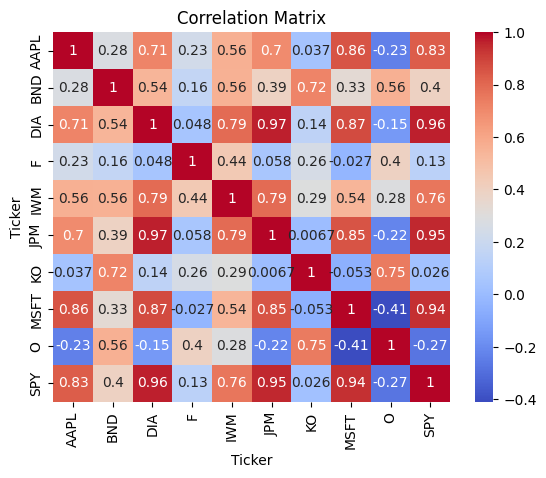

In [86]:
# plotting the correlation method in a Heatmap. credit to Alex Guerrero
sns.heatmap(corr_matrix_data, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.show()